# Desafio Latam - Data Scientist

<div style="text-align: right"> by Juan Pablo Palma B. </div>

## 0. Instalar dependencias y librerias

Para poder instalar las librerias que se necesitan se debe correr la siguiente linea de codigo que instalara todo lo necesario para correr este notebook.

> pip install -r requirements.txt

## 1. Instrucciones

En Advanced Analytics valoramos muchísimo el trabajo en equipo y la constante interacción entre los distintos roles que trabajan en
un producto basado en datos, como el Data Scientist, Machine Learning Engineering, Data Engineer, entre otros. Es por este motivo que una habilidad esencial que buscamos a la hora de buscar nuevos integrantes es el _manejo adecuado de git_. Este desafío deberá ser entregado en la plataforma de git que más te acomode y que sea pública para que la podamos revisar. Lo que buscamos con esto es poder entender de mejor manera el desarrollo que generaste con tu código, cómo lo fuiste mejorando en el tiempo y si tienes proyectos propios en este repositorio nos servirán para conocer mejor tu experiencia en base a tu propio portafolio.

Instrucciones Git:
1. Crear un repositorio en la plataforma de git que más te acomode y que sea pública.
2. Haber trabajado con una rama principal y otra de desarrollo. Opcional, ocupar alguna práctica de desarrollo de GitFlow.

Instrucciones del desafío:
1. Debes enviar el link al repositorio al mail del que fuiste contactado con asunto Challenge Data Scientist - [Nombre][Apellido], ejemplo Challenge Data Scientist - Pedro Pica Piedra.
2. Se aceptará los cambios en el repositorio hasta la fecha y hora que se indique en el mail.
3. En la siguiente carpeta de Google Drive encontrarás las instrucciones del desafío y el archivo `dataset_SCL.csv` que utilizarás para desarrollarlo.
4. El repositorio debe tener un jupyter notebook llamado solution.ipynb utilizando python 3. No serán revisados otros lenguajes como R o similar.
5. En solution.ipynb deben estar resueltas las respuestas a todas las preguntas del desafío
6. Dentro del repositorio deben estar todos los archivos necesarios para que los evaluadores puedan clonar y luego correr tu notebook sin problemas
7. Una copia de tu CV (curriculum vitae) en formato .pdf en el repositorio

## 2. Problema

El problema consiste en **predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL)**. Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

>Fecha-I : Fecha y hora programada del vuelo.<br> 
Vlo-I : Número de vuelo programado. <br> 
Ori-I : Código de ciudad de origen programado. <br> 
Des-I : Código de ciudad de destino programado. <br> 
Emp-I : Código aerolínea de vuelo programado. <br> 
Fecha-O : Fecha y hora de operación del vuelo. <br> 
Vlo-O : Número de vuelo de operación del vuelo.<br> 
Ori-O : Código de ciudad de origen de operación.<br> 
Des-O : Código de ciudad de destino de operación.<br> 
Emp-O : Código aerolínea de vuelo operado.<br> 
DIA : Día del mes de operación del vuelo.<br> 
MES : Número de mes de operación del vuelo.<br> 
AÑO : Año de operación del vuelo.<br> 
DIANOM : Día de la semana de operación del vuelo.<br> 
TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.<br> 
OPERA : Nombre de aerolínea que opera.<br> 
SIGLAORI : Nombre ciudad origen.<br> 
SIGLADES : Nombre ciudad destino.

## Vista preliminar and check the dataset

### Importar librerias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import (
    ensemble,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC,
)
from yellowbrick.model_selection import (
    LearningCurve,
)

### Cargar la base de datos

In [2]:
path = (
    "dataset_SCL.csv"
)

df = pd.read_csv(path)

/var/folders/mw/k879zy5s2zqb1wgxjyzffkb00000gn/T/ipykernel_76903/172632035.py:5: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


### Checkiar con inspeccion visual los datos tanto los primeros como los ultimos casos

In [3]:
df.shape

(68206, 18)

In [4]:
df.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [5]:
df.tail(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima


### Inspeccion preliminar

In [6]:
df.columns=[col.replace('-','_') for col in df.columns] #fix names of columns for easy calling

#### check if the dataset is only 2017

In [7]:
#df.query('AÑO==2017')
df.query('AÑO!=2017') # note that most of the cases are in 2017 and only two of them in 2018, but the Fecha_I is 2017

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


In [8]:
df.dtypes # we will try to fix the correct type for each variable respecting their characteristics

Fecha_I      object
Vlo_I        object
Ori_I        object
Des_I        object
Emp_I        object
Fecha_O      object
Vlo_O        object
Ori_O        object
Des_O        object
Emp_O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

### Corregir el tipo de variable

>Fecha-I : Fecha y hora programada del vuelo. --> **Date**<br> 
Vlo-I : Número de vuelo programado. --> **Numeric**<br> 
Ori-I : Código de ciudad de origen programado. --> **String**<br> 
Des-I : Código de ciudad de destino programado. --> **String**<br> 
Emp-I : Código aerolínea de vuelo programado. --> **String**<br> 
Fecha-O : Fecha y hora de operación del vuelo. --> **Date**<br> 
Vlo-O : Número de vuelo de operación del vuelo. --> **Numeric**<br> 
Ori-O : Código de ciudad de origen de operación. --> **String**<br> 
Des-O : Código de ciudad de destino de operación. --> **String**<br> 
Emp-O : Código aerolínea de vuelo operado. --> **String**<br> 
DIA : Día del mes de operación del vuelo. --> **Numeric**<br> 
MES : Número de mes de operación del vuelo. --> **Integer**<br> 
AÑO : Año de operación del vuelo. --> **Numeric**<br> 
DIANOM : Día de la semana de operación del vuelo. --> **String**<br> 
TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional. --> **String**<br> 
OPERA : Nombre de aerolínea que opera. --> **String**<br> 
SIGLAORI : Nombre ciudad origen. --> **String**<br> 
SIGLADES : Nombre ciudad destino. --> **String**

#### Date variables

In [9]:
date = ['Fecha_I', 'Fecha_O']
df[date]=  df[date].apply(pd.to_datetime)

#### Numeric variables

In [10]:
enteros = ['Vlo_I', 'Vlo_O', 'DIA', 'MES', 'AÑO']

for col in  df[enteros]:
    df[col] = pd.to_numeric(df[col],errors='coerce')

In [11]:
df.dtypes #corregido

Fecha_I      datetime64[ns]
Vlo_I               float64
Ori_I                object
Des_I                object
Emp_I                object
Fecha_O      datetime64[ns]
Vlo_O               float64
Ori_O                object
Des_O                object
Emp_O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

In [12]:
df.select_dtypes(include='number')

,Vlo_I,Vlo_O,DIA,MES,AÑO
0,226.0,226.0,1,1,2017
1,226.0,226.0,2,1,2017
2,226.0,226.0,3,1,2017
3,226.0,226.0,4,1,2017
4,226.0,226.0,5,1,2017
...,...,...,...,...,...
68201,400.0,400.0,22,12,2017
68202,400.0,400.0,25,12,2017
68203,400.0,400.0,27,12,2017
68204,400.0,400.0,29,12,2017


In [13]:
df.select_dtypes(include='object')

,Ori_I,Des_I,Emp_I,Ori_O,Des_O,Emp_O,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,SCEL,KMIA,AAL,SCEL,KMIA,AAL,Domingo,I,American Airlines,Santiago,Miami
1,SCEL,KMIA,AAL,SCEL,KMIA,AAL,Lunes,I,American Airlines,Santiago,Miami
2,SCEL,KMIA,AAL,SCEL,KMIA,AAL,Martes,I,American Airlines,Santiago,Miami
3,SCEL,KMIA,AAL,SCEL,KMIA,AAL,Miercoles,I,American Airlines,Santiago,Miami
4,SCEL,KMIA,AAL,SCEL,KMIA,AAL,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...
68201,SCEL,SPJC,JAT,SCEL,SPJC,JAT,Viernes,I,JetSmart SPA,Santiago,Lima
68202,SCEL,SPJC,JAT,SCEL,SPJC,JAT,Lunes,I,JetSmart SPA,Santiago,Lima
68203,SCEL,SPJC,JAT,SCEL,SPJC,JAT,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,SCEL,SPJC,JAT,SCEL,SPJC,JAT,Viernes,I,JetSmart SPA,Santiago,Lima


In [14]:
df.select_dtypes(include='datetime64[ns]')

,Fecha_I,Fecha_O
0,2017-01-01 23:30:00,2017-01-01 23:33:00
1,2017-01-02 23:30:00,2017-01-02 23:39:00
2,2017-01-03 23:30:00,2017-01-03 23:39:00
3,2017-01-04 23:30:00,2017-01-04 23:33:00
4,2017-01-05 23:30:00,2017-01-05 23:28:00
...,...,...
68201,2017-12-22 14:55:00,2017-12-22 15:41:00
68202,2017-12-25 14:55:00,2017-12-25 15:11:00
68203,2017-12-27 14:55:00,2017-12-27 15:35:00
68204,2017-12-29 14:55:00,2017-12-29 15:08:00


### Missing Values

In [15]:
df.isna().sum()

Fecha_I       0
Vlo_I         5
Ori_I         0
Des_I         0
Emp_I         0
Fecha_O       0
Vlo_O        17
Ori_O         0
Des_O         0
Emp_O         0
DIA           0
MES           0
AÑO           0
DIANOM        0
TIPOVUELO     0
OPERA         0
SIGLAORI      0
SIGLADES      0
dtype: int64

**Nota**: los valores que son considerados como perdidos no tienen influencia ni el analisis ni en el modelo, por tanto, no haremos nada con ellos.

## 3. Desafio

1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?
2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
    * temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
    * dif_min : diferencia en minutos entre Fecha-O y Fecha-I . 
    * atraso_15 : 1 si dif_min > 15, 0 si no. 
    * periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .
3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?
4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.
5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

## 3.1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [16]:
my_string = '''An Error with the library pandas_profiling was raised, please check the library configuration
Please check: 
https://pypi.org/project/pandas-profiling/ OR
https://towardsdatascience.com/pandas-profiling-easy-exploratory-data-analysis-in-python-65d6d0e23650 OR
https://github.com/ydataai/pandas-profiling'''

try:
    import pandas_profiling
    
except:
    print(my_string)

In [17]:
profile = df.profile_report()

In [18]:
profile.to_file("EDA_preliminar.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Respuesta 3.1

Para el analisis exploratorio (EDA) he utilizado la libreria `pandas_profiling` y descargado el html producto en el repositorio (`EDA_priliminar.html`). Sin embargo, al parecer github no carga elementos tan pesados o tiene problemas para interpretarlo. Por lo tanto, ante cualquier problema o dificultad para visualizar la descripcion de los datos es solo llamar el objeto `profile` que ya contiene la informacion y se desplegara en este notebook.

> `profile`


Por otro lado, enunciare algunos <u>insights</u> o elementos que llaman la atencion respecto a los datos:

* Hay un total de 68.206 vuelos en la base de datos.
* Todos los vuelos tienen como origen Santiago y tienen planeado su despegue en el año 2017.
* La cantidad de vuelos es estable durante los dias del mes (excepto el dia 31 que por logica, no ocurre todos los meses).
* Los meses con mas vuelos parecen ser Enero, Julio, Octubre, Noviembre y Diciembre. Otra forma de decirlo es que si se ve una baja en las operaciones en Abril, Mayo y Junio, aunque es muy preliminar para saber si es significativo.
    * Esto ya descarta una hipotesis plausible, que es que se esperara una demanda mayor en meses de Diciembre, Enero y Febrero.
    * U otra opcion es que los mediado y fines de mes tuviesen mas demanda, lo cual tampoco es cierto.  
* La mayor cantidad de vuelos fueron nacionales (54,2%), e internacionales (47,6%).
* La aerolinea lider en cantidad de vuelos es el Grupo LATAM con el 60% de los vuelos, seguidos de Sky Airlines con el 20%.
* Los destinos mas populares fueron Buenos Aires (I), Antofagasta (N), Lima (I), Calama (N) y Puerto Montt (N).

**Comentarios Finales:**

La base de datos esta bastante limpia y solo tiene algunos datos perdidos en el numero del vuelo (que es una variable que muy probablemente descartemos en el futuro). Y por otro lado, tiene o variables con poca varianza entre categorias distribuidas (como Dia del mes) o variables con muchas categorias y muy concentradas como los destinos (estas habra que concentrarlas en categorias que hagan sentido). Me parece que las variables propuestas como sinteticas (o indicadores en lenguaje mas tecnico) permitiran ver con mas claridad el poder explicativo de estas en base a predecir la probabilidad de atraso. Finalmente, otras variables como la tasa de atraso esta tambien muy desbalanceada siendo "atraso" una categoria minoritaria y esto tambien puede traer problemas en la prediccion. 

## 3.2 Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv
   * temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
   * dif_min : diferencia en minutos entre Fecha-O y Fecha-I . 
   * atraso_15 : 1 si dif_min > 15, 0 si no. 
   * periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

### 3.2.1 temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

In [19]:
df.Fecha_I.dt.date

0        2017-01-01
1        2017-01-02
2        2017-01-03
3        2017-01-04
4        2017-01-05
            ...    
68201    2017-12-22
68202    2017-12-25
68203    2017-12-27
68204    2017-12-29
68205    2017-12-31
Name: Fecha_I, Length: 68206, dtype: object

In [20]:
df.Fecha_I.dt.year.value_counts() #solo valores de 2017, por lo tanto, los intervalos solo cubriran ese anho

2017    68206
Name: Fecha_I, dtype: int64

In [21]:
df['temporada_alta']= 0

df['temporada_alta'][((df['Fecha_I'] >= '1/1/2017') & (df['Fecha_I'] <= '3/3/2017 23:59:59')) |
                    ((df['Fecha_I'] >= '15/7/2017') & (df['Fecha_I'] <= '31/7/2017 23:59:59')) | 
                    ((df['Fecha_I'] >= '11/9/2017') & (df['Fecha_I'] <= '30/9/2017 23:59:59')) | 
                    ((df['Fecha_I'] >= '15/12/2017') & (df['Fecha_I'] <= '31/12/2017 23:59:59'))] = 1

/Users/jppalmab/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:60: UserWarning: Parsing '15/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.ge)
/var/folders/mw/k879zy5s2zqb1wgxjyzffkb00000gn/T/ipykernel_76903/1609323504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temporada_alta'][((df['Fecha_I'] >= '1/1/2017') & (df['Fecha_I'] <= '3/3/2017 23:59:59')) |


In [22]:
df.temporada_alta.value_counts()
#df.head()
#df.tail()

0    49201
1    19005
Name: temporada_alta, dtype: int64

In [23]:
#Query para checkiar que los intervalos quedasen bien definidos especialmente por la hora.

#df.query("Fecha_I >= '2017-01-01' and Fecha_I <= '2017-03-03'")
#df.query("Fecha_I >= '2017-03-04' and Fecha_I <= '2017-03-14'")
#df.query("Fecha_I >= '2017-07-15' and Fecha_I <= '2017-07-31'")
#df.query("Fecha_I >= '2017-08-01' and Fecha_I <= '2017-09-10'")
#df.query("Fecha_I >= '2017-09-11' and Fecha_I <= '2017-09-30'")
#df.query("Fecha_I >= '2017-10-01' and Fecha_I <= '2017-12-14'")
#df.query("Fecha_I >= '2017-12-15' and Fecha_I <= '2017-12-31'")

### 3.2.2 dif_min : diferencia en minutos entre Fecha-O y Fecha-I .

In [24]:
df['dif_min'] = df.Fecha_O - df.Fecha_I
df['dif_min']=df['dif_min'].astype('timedelta64[m]')

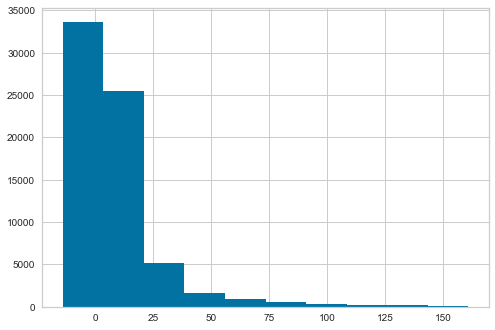

In [25]:
plt.hist(df.dif_min)
plt.show()

### 3.2.3 atraso_15 : 1 si dif_min > 15, 0 si no.

In [26]:
df['atraso_15'] = df['dif_min'] > 15
df['atraso_15'] = df['atraso_15'].astype('int')

In [27]:
df.atraso_15.value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

### 3.2.3 periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

In [28]:
# define bins and labels
bins = ['00:00:00','04:59:59', '11:59:59', '18:59:59', '23:59:59']
labels = ['noche', 'mañana', 'tarde', 'noche']

# convert to timedelta
s = pd.to_timedelta(pd.to_datetime(df['Fecha_I']).dt.time.astype(str))
df['periodo_dia'] = pd.cut(s, bins=pd.to_timedelta(bins), labels=labels, ordered=False)

In [29]:
df['periodo_dia']=df['periodo_dia'].astype('object')

In [30]:
#df['periodo_dia'].isnull()

In [31]:
### Nota: Hubo dos casos que no lograron ser identificados como noche con la transformacion anterior, estos casos 
###      fueron identificados y corregidos

#df.query('periodo_dia.isna()==True')
#df.iloc[19209:19210]
#df.iloc[32197:32198]
df.iloc[19209,21] = 'noche'
df.iloc[32197,21] = 'noche'

In [32]:
df.query('periodo_dia.isna()==True')

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia


### 3.2.4 Export the synthetic features to new data frame

In [33]:
#df.dtypes

In [34]:
header = ["temporada_alta", "dif_min", "atraso_15", "periodo_dia"]

df.to_csv('synthetic_features.csv', columns = header)

## 3.3 ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

>Fecha-I : Fecha y hora programada del vuelo.<br> 
Vlo-I : Número de vuelo programado. <br> 
Ori-I : Código de ciudad de origen programado. <br> 
Des-I : Código de ciudad de destino programado. <br> 
Emp-I : Código aerolínea de vuelo programado. <br> 
Fecha-O : Fecha y hora de operación del vuelo. <br> 
Vlo-O : Número de vuelo de operación del vuelo.<br> 
Ori-O : Código de ciudad de origen de operación.<br> 
Des-O : Código de ciudad de destino de operación.<br> 
Emp-O : Código aerolínea de vuelo operado.<br> 
DIA : Día del mes de operación del vuelo.<br> 
MES : Número de mes de operación del vuelo.<br> 
AÑO : Año de operación del vuelo.<br> 
DIANOM : Día de la semana de operación del vuelo.<br> 
TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.<br> 
OPERA : Nombre de aerolínea que opera.<br> 
SIGLAORI : Nombre ciudad origen.<br> 
SIGLADES : Nombre ciudad destino.<br>
temporada_alta: dicotomico identificador de temporada alta.<br>
dif_min: diferencia en minutos entre la hora de vuelo y la opera de operacion.<br>
atraso_15: identificador de vuelos que se atrasaron en mas de 15 minutos.<br>
priodo_dia: identificador de si el vuelo fue de mañana, tarde o noche.

In [35]:
#df.dtypes

### Tasa de atraso

In [36]:
import seaborn as sns

In [37]:
df.atraso_15.value_counts()/68206*100 #En porcentage

0    81.506026
1    18.493974
Name: atraso_15, dtype: float64

**NOTA:**

Solo el 18.5% de los vuelos en 2017 presentaron algun tipo de retraso de mas de 15 minutos.

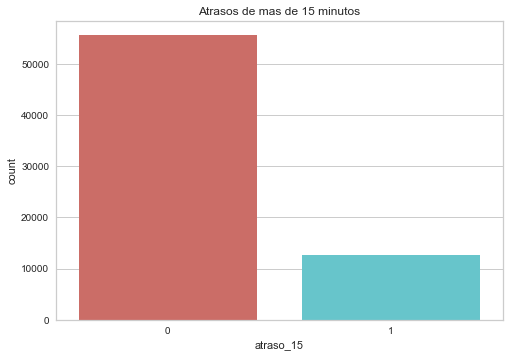

In [38]:
sns.countplot(x='atraso_15' ,data=df, palette="hls")
plt.title("Atrasos de mas de 15 minutos")
plt. show()

### por Destino

Text(0.5, 1.0, 'Atrasos(o no) segun destino')

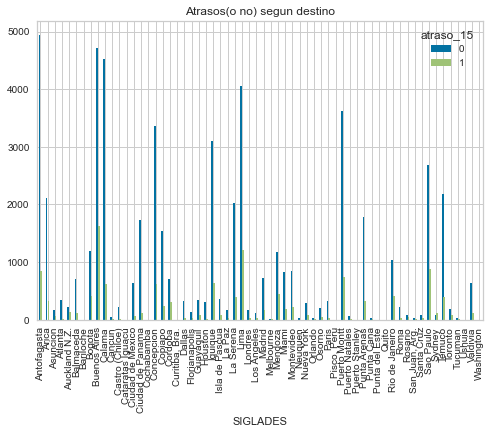

In [39]:
pd.crosstab(df.SIGLADES, df.atraso_15).plot.bar(rot=90)
plt.title("Atrasos(o no) segun destino")

Text(0.5, 1.0, 'Atrasos segun destino')

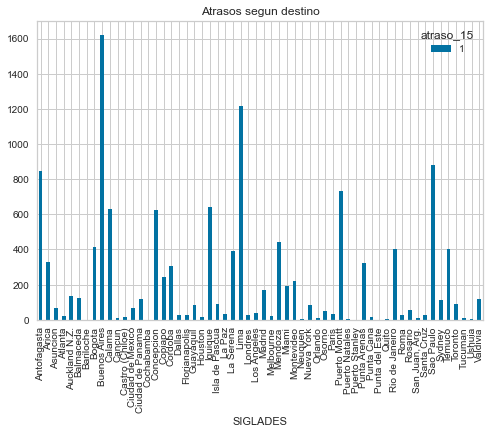

In [40]:
pd.crosstab(df.SIGLADES, df.atraso_15[df.atraso_15==1]).plot.bar(rot=90)
plt.title("Atrasos segun destino")

In [41]:
df.SIGLADES[df.atraso_15[df.atraso_15==1]].value_counts().nlargest(5)

Miami    12614
Name: SIGLADES, dtype: int64

**NOTA:**

Mirado desde la perspectiva unicamente de los atrasos, existen ciudades que destacan entre los atrasos como `Buenos aires`, `Lima`, `Sao Paulo`y `Antofagasta` que destacan por sobre los 800 atrasos en un año, lo que lo haria mas probable y potencialmente una variable explicativa.

### por Aerolinea

<AxesSubplot:xlabel='OPERA'>

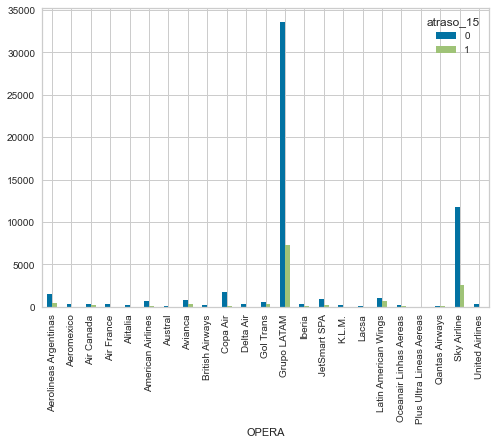

In [42]:
pd.crosstab(df.OPERA, df.atraso_15).plot.bar(rot=90)

**NOTA:**

Si bien `Grupo Latam` tiene mas atrasos que el resto de compañias, tambien es cierto que concentra mas de la mitad de los vuelos.

### por Mes del Año

<AxesSubplot:xlabel='MES'>

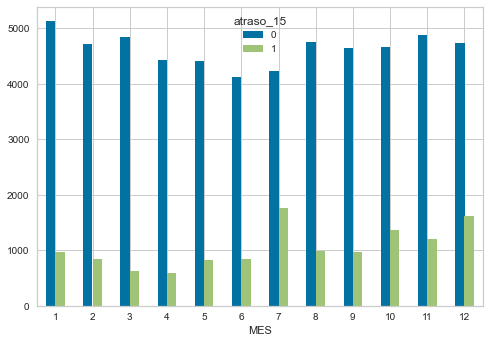

In [43]:
pd.crosstab(df.MES, df.atraso_15).plot.bar(rot=0)

**NOTA:**

Sin duda el Mes puede ser una variable super interesante en el analasis, principalmente por el aumento de atrasos en el mes de Julio, Octubre y diciembre. Es posible que la inclusion de esta variable aporte poder predictivo al modelo.

### por Dia de la semana

<AxesSubplot:xlabel='DIANOM'>

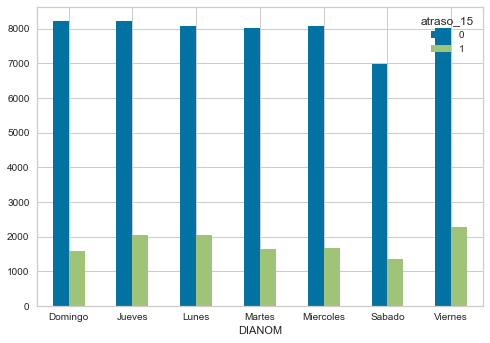

In [44]:
pd.crosstab(df.DIANOM, df.atraso_15).plot.bar(rot=0)

<AxesSubplot:xlabel='DIA'>

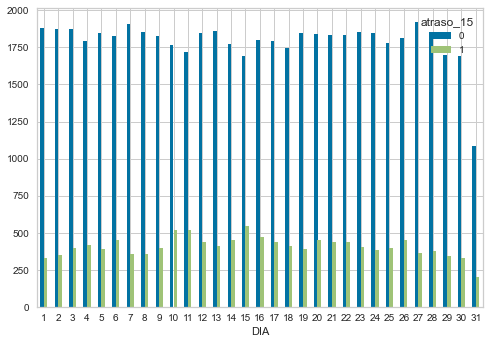

In [45]:
pd.crosstab(df.DIA, df.atraso_15).plot.bar(rot=0)

Los dias de la semana de un mes no parecerian entregar demasiada informacion a un modelo.

### por Tipo de Vuelo

<AxesSubplot:xlabel='TIPOVUELO'>

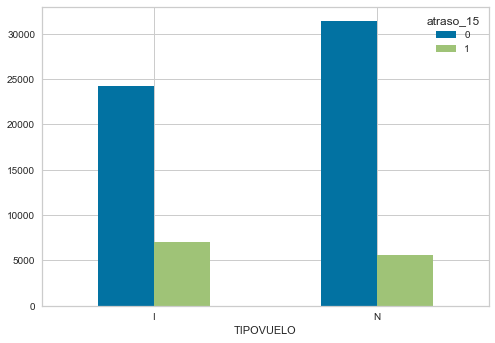

In [46]:
pd.crosstab(df.TIPOVUELO, df.atraso_15).plot.bar(rot=0)

Definitivamente hay mas atrasos en vuelos internacionales, y es una variable teoricamente sustantiva para el analisis bajo la hipotesis que la burocracia y esfuerzos para volar entre paises es mayou que en vuelos nacionales. Por lo demas, hace sentido con lo visto donde los destinos con mayores atrasos esta Buenos Aires, Lima y Sao Paulo entre otros.

### por Temporada alta o baja

<AxesSubplot:xlabel='temporada_alta'>

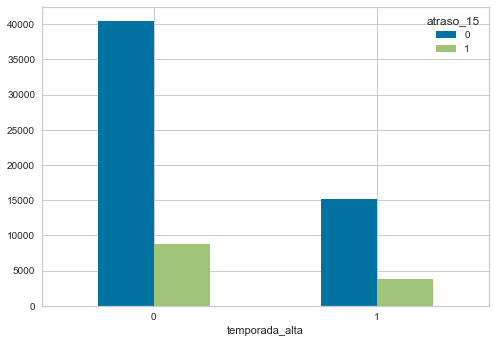

In [47]:
pd.crosstab(df.temporada_alta, df.atraso_15).plot.bar(rot=0)

Por el contrario que se pueda creer parecen haber mas atrasos en temporada baja que en temporada alta.

## 3.4 Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

### 3.4.1 Limpiar la base a variables utiles

In [48]:
df_baseline = df.copy()
#df = df_baseline.copy()

In [49]:
df.columns

Index(['Fecha_I', 'Vlo_I', 'Ori_I', 'Des_I', 'Emp_I', 'Fecha_O', 'Vlo_O',
       'Ori_O', 'Des_O', 'Emp_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'dif_min',
       'atraso_15', 'periodo_dia'],
      dtype='object')

In [50]:
df.head(3)

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226.0,SCEL,KMIA,AAL,2017-01-01 23:33:00,226.0,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226.0,SCEL,KMIA,AAL,2017-01-02 23:39:00,226.0,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226.0,SCEL,KMIA,AAL,2017-01-03 23:39:00,226.0,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche


In [51]:
columns_todrop = ['Vlo_I', 'Ori_I', 'Des_I','Emp_I', 'Fecha_O', 'Vlo_O',
       'Ori_O', 'Des_O', 'Emp_O', 'AÑO', 'SIGLAORI', 'dif_min']

In [52]:
df = df.drop(columns=columns_todrop)

In [53]:
df.head()

,Fecha_I,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,atraso_15,periodo_dia
0,2017-01-01 23:30:00,1,1,Domingo,I,American Airlines,Miami,1,0,noche
1,2017-01-02 23:30:00,2,1,Lunes,I,American Airlines,Miami,1,0,noche
2,2017-01-03 23:30:00,3,1,Martes,I,American Airlines,Miami,1,0,noche
3,2017-01-04 23:30:00,4,1,Miercoles,I,American Airlines,Miami,1,0,noche
4,2017-01-05 23:30:00,5,1,Jueves,I,American Airlines,Miami,1,0,noche


### 3.4.2 Crear features

#### Recodificar la sigla de destino a una agrupacion sustantiva.

Para eso tomaremos todas las ciudades con mas de 400 atrasos.

In [54]:
df.SIGLADES.value_counts().nlargest(10)

Buenos Aires    6335
Antofagasta     5786
Lima            5270
Calama          5146
Puerto Montt    4357
Concepcion      3993
Iquique         3747
Sao Paulo       3569
Temuco          2589
Arica           2436
Name: SIGLADES, dtype: int64

In [55]:
df.SIGLADES[df['atraso_15']==1].value_counts().nlargest(25) # Vamos a tomar solo los > 400 atrasos

Buenos Aires        1620
Lima                1214
Sao Paulo            881
Antofagasta          847
Puerto Montt         734
Iquique              640
Calama               629
Concepcion           623
Mendoza              443
Bogota               415
Rio de Janeiro       405
Temuco               403
La Serena            390
Arica                330
Punta Arenas         324
Cordoba              308
Copiapo              242
Montevideo           220
Miami                194
Madrid               170
Auckland N.Z.        135
Balmaceda            123
Valdivia             117
Ciudad de Panama     116
Sydney               113
Name: SIGLADES, dtype: int64

In [56]:
df['SIGLADES'][((df['SIGLADES'] != 'Buenos Aires') & 
                (df['SIGLADES'] != 'Lima') &
                (df['SIGLADES'] != 'Sao Paulo') &
                (df['SIGLADES'] != 'Antofagasta') &
                (df['SIGLADES'] != 'Puerto Montt') &
                (df['SIGLADES'] != 'Iquique') &
                (df['SIGLADES'] != 'Calama') &
                (df['SIGLADES'] != 'Concepcion') &
                (df['SIGLADES'] != 'Mendoza') &
                (df['SIGLADES'] != 'Bogota') &
                (df['SIGLADES'] != 'Rio de Janeiro') &
                (df['SIGLADES'] != 'Temuco')
                )
              ] = 'Otros'

/var/folders/mw/k879zy5s2zqb1wgxjyzffkb00000gn/T/ipykernel_76903/1546982436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SIGLADES'][((df['SIGLADES'] != 'Buenos Aires') &


Text(0.5, 1.0, 'Atrasos segun destino')

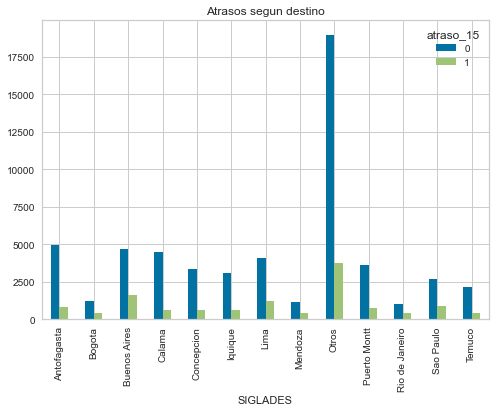

In [57]:
pd.crosstab(df.SIGLADES, df.atraso_15).plot.bar(rot=90)
plt.title("Atrasos segun destino")

Text(0.5, 1.0, 'Atrasos segun destino')

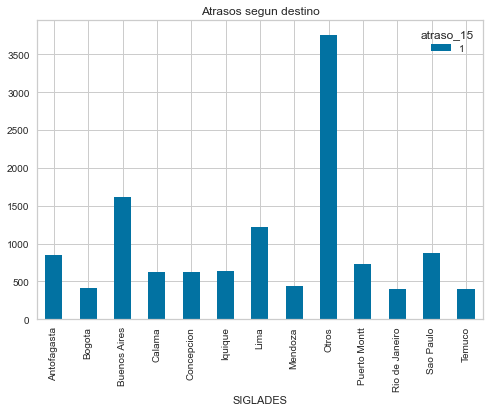

In [58]:
pd.crosstab(df.SIGLADES, df.atraso_15[df.atraso_15==1]).plot.bar(rot=90)
plt.title("Atrasos segun destino")

#### Recodificamos a las operadoras entre el Grupo LATAM, SKY y otras.

In [59]:
df.OPERA.value_counts().nlargest(10)

Grupo LATAM              40892
Sky Airline              14298
Aerolineas Argentinas     1949
Copa Air                  1850
Latin American Wings      1674
Avianca                   1152
JetSmart SPA              1095
Gol Trans                  806
American Airlines          757
Air Canada                 565
Name: OPERA, dtype: int64

In [60]:
df['OPERA'][((df['OPERA'] != 'Grupo LATAM') & 
             (df['OPERA'] != 'Sky Airline')
            )] = 'Otras'

/var/folders/mw/k879zy5s2zqb1wgxjyzffkb00000gn/T/ipykernel_76903/78035175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OPERA'][((df['OPERA'] != 'Grupo LATAM') &


Text(0.5, 1.0, 'Atrasos segun destino')

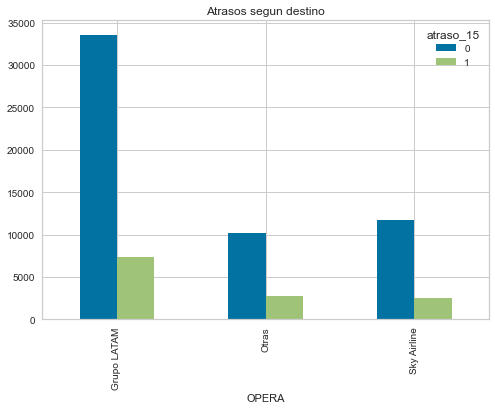

In [61]:
pd.crosstab(df.OPERA, df.atraso_15).plot.bar(rot=90)
plt.title("Atrasos segun destino")

#### Creamos la variable sesion que es la epoca climatica del año

In [62]:
df['season'] = "No"
df['season'][((df['Fecha_I'] >= '21/12/2017') & (df['Fecha_I'] <= '31/12/2017 23:59:59'))] = "verano"
df['season'][((df['Fecha_I'] >= '01/01/2017') & (df['Fecha_I'] <= '20/03/2017 23:59:59'))] = "verano"
df['season'][((df['Fecha_I'] >= '21/03/2017') & (df['Fecha_I'] <= '20/06/2017 23:59:59'))] = "otoño"             
df['season'][((df['Fecha_I'] >= '21/06/2017') & (df['Fecha_I'] <= '20/09/2017 23:59:59'))] = "invierno"
df['season'][((df['Fecha_I'] >= '21/09/2017') & (df['Fecha_I'] <= '20/12/2017 23:59:59'))] = "primavera"

/Users/jppalmab/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:60: UserWarning: Parsing '21/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.ge)
/var/folders/mw/k879zy5s2zqb1wgxjyzffkb00000gn/T/ipykernel_76903/4552958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'][((df['Fecha_I'] >= '21/12/2017') & (df['Fecha_I'] <= '31/12/2017 23:59:59'))] = "verano"
/var/folders/mw/k879zy5s2zqb1wgxjyzffkb00000gn/T/ipykernel_76903/4552958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seas

In [63]:
df.season.value_counts()

primavera    18126
verano       17472
invierno     17121
otoño        15487
Name: season, dtype: int64

#### Asignamos a los meses sus nombres para poder procesarla como variable categorica

In [64]:
df['MES'] = df.Fecha_I.dt.month_name()

#### Generamos las variables dummys desde las variables categoricas

In [65]:
df = pd.get_dummies(df)

In [66]:
df.columns

Index(['Fecha_I', 'DIA', 'temporada_alta', 'atraso_15', 'MES_April',
       'MES_August', 'MES_December', 'MES_February', 'MES_January', 'MES_July',
       'MES_June', 'MES_March', 'MES_May', 'MES_November', 'MES_October',
       'MES_September', 'DIANOM_Domingo', 'DIANOM_Jueves', 'DIANOM_Lunes',
       'DIANOM_Martes', 'DIANOM_Miercoles', 'DIANOM_Sabado', 'DIANOM_Viernes',
       'TIPOVUELO_I', 'TIPOVUELO_N', 'OPERA_Grupo LATAM', 'OPERA_Otras',
       'OPERA_Sky Airline', 'SIGLADES_Antofagasta', 'SIGLADES_Bogota',
       'SIGLADES_Buenos Aires', 'SIGLADES_Calama', 'SIGLADES_Concepcion',
       'SIGLADES_Iquique', 'SIGLADES_Lima', 'SIGLADES_Mendoza',
       'SIGLADES_Otros', 'SIGLADES_Puerto Montt', 'SIGLADES_Rio de Janeiro',
       'SIGLADES_Sao Paulo', 'SIGLADES_Temuco', 'periodo_dia_mañana',
       'periodo_dia_noche', 'periodo_dia_tarde', 'season_invierno',
       'season_otoño', 'season_primavera', 'season_verano'],
      dtype='object')

#### Y eliminamos la categoria de referencia

In [67]:
df = df.drop(columns=["DIA",
                      "Fecha_I",
                      'MES_January',
                      'DIANOM_Domingo',
                      "TIPOVUELO_N",
                      "OPERA_Otras",
                      "SIGLADES_Otros",
                      "periodo_dia_mañana",
                      "season_otoño"])

In [68]:
df.head(10)

,temporada_alta,atraso_15,MES_April,MES_August,MES_December,MES_February,MES_July,MES_June,MES_March,MES_May,...,SIGLADES_Mendoza,SIGLADES_Puerto Montt,SIGLADES_Rio de Janeiro,SIGLADES_Sao Paulo,SIGLADES_Temuco,periodo_dia_noche,periodo_dia_tarde,season_invierno,season_primavera,season_verano
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### 3.4.3 Sampling

In [69]:
y = df.atraso_15
X = df.drop(columns="atraso_15")

In [70]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.3, random_state=42) 

### 3.4.4 Otras familias de modelos para classificacion

In [71]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [72]:
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import (LogisticRegression,)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import (KNeighborsClassifier,)

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier,)

import sklearn.metrics as metrics

import xgboost as xgb

for model in [
    DummyClassifier,
    LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    GaussianNB,
    #SVC,
    RandomForestClassifier,
    xgb.XGBClassifier,
]:
    cls = model()
    kfold = model_selection.KFold(n_splits=10, random_state=None) #42
    s = model_selection.cross_val_score(cls, X, y, scoring="roc_auc", cv=kfold)
    print(f"{model.__name__:22}  AUC: "
          f"{s.mean():.3f} STD: {s.std():.2f}")

DummyClassifier         AUC: 0.500 STD: 0.00
LogisticRegression      AUC: 0.640 STD: 0.01
DecisionTreeClassifier  AUC: 0.611 STD: 0.01
KNeighborsClassifier    AUC: 0.608 STD: 0.01
GaussianNB              AUC: 0.623 STD: 0.01
RandomForestClassifier  AUC: 0.628 STD: 0.01
XGBClassifier           AUC: 0.692 STD: 0.01


### 3.4.5 Eligiremos XGBC Classifier

In [73]:
xgb_class = xgb.XGBClassifier(random_state=42)
xgb_class.fit(
    X_train,
    y_train,
    early_stopping_rounds=10,
    eval_set=[(X_test, y_test)],
)

[0]	validation_0-logloss:0.58478
[1]	validation_0-logloss:0.52812


/Users/jppalmab/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-logloss:0.49646
[3]	validation_0-logloss:0.47691
[4]	validation_0-logloss:0.46650
[5]	validation_0-logloss:0.45978
[6]	validation_0-logloss:0.45623
[7]	validation_0-logloss:0.45322
[8]	validation_0-logloss:0.45178
[9]	validation_0-logloss:0.45037
[10]	validation_0-logloss:0.44895
[11]	validation_0-logloss:0.44804
[12]	validation_0-logloss:0.44748
[13]	validation_0-logloss:0.44685
[14]	validation_0-logloss:0.44610
[15]	validation_0-logloss:0.44523
[16]	validation_0-logloss:0.44504
[17]	validation_0-logloss:0.44490
[18]	validation_0-logloss:0.44392
[19]	validation_0-logloss:0.44331
[20]	validation_0-logloss:0.44329
[21]	validation_0-logloss:0.44305
[22]	validation_0-logloss:0.44309
[23]	validation_0-logloss:0.44298
[24]	validation_0-logloss:0.44292
[25]	validation_0-logloss:0.44302
[26]	validation_0-logloss:0.44296
[27]	validation_0-logloss:0.44275
[28]	validation_0-logloss:0.44283
[29]	validation_0-logloss:0.44257
[30]	validation_0-logloss:0.44251
[31]	validation_0-logl

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

## 3.5 Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

### 3.5.1 Performance

El metodo de `.score` nos da el promedio del accuracy de la prediccion.

In [74]:
xgb_class.score(X_test, y_test)

0.8176620076238882

In [75]:
metrics.precision_score(
    y_test, xgb_class.predict(X_test))

0.5936883629191322

In [76]:
xgb_class.predict(X.iloc[[0]])

array([0])

In [77]:
xgb_class.predict_proba(X.iloc[[0]])

array([[0.8380517 , 0.16194831]], dtype=float32)

### 3.5.2 Metricas de evaluacion

/Users/jppalmab/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


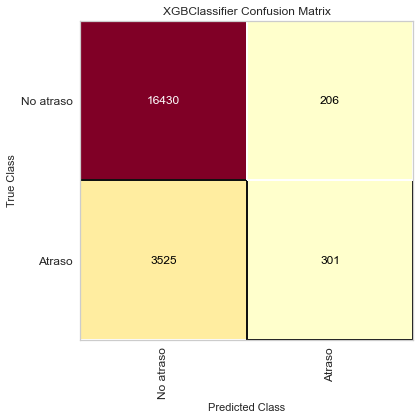

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [78]:
from sklearn.metrics import confusion_matrix
y_pred = xgb_class.predict(X_test)

confusion_matrix(y_test, y_pred)

mapping = {0: "No atraso", 1: "Atraso"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    xgb_class,
    classes=["No atraso", "Atraso"],
    label_encoder=mapping,
)
cm_viz.score(X_test, y_test)
cm_viz.poof()

In [79]:
confusion_matrix(y_test, y_pred)/confusion_matrix(y_test, y_pred).sum()*100

array([[80.29518131,  1.00674421],
       [17.22705503,  1.47101945]])

In [80]:
recall = 301/(3525+301)
print(recall)

0.07867224255096707


In [81]:
y_pred = xgb_class.predict(X_test)

roc_auc_score(y_test, y_pred)

0.5331447291139062

Las metricas utilizadas para la evaluacion son primeramente la `confusion matrix` que nos muestra que pese al buen accuracy del modelo, este es bastante pobre en otros parametros tales como el `recall`, es decir,  la cantidad que el modelo es capaz de identificar.

### 3.5.3 Razon de elegir ese modelo en particular

He elegido el modelo por dos razones. El primero, porque en la evaluacion primaria el modelo tenia un `AUC` alto y un error bajo. Pero en segundo lugar, los modelos basados en arbol son utiles para explorar visualmente las variables significativas de un modelo. Y en este caso, donde las pistas son pocas y el poder explicativo limitado, es importante saber que variables son las que mas aportan poder explicativo al modelo.

### 3.5.4 Que variables son las que mas influyeron

In [82]:
for col, val in sorted(
    zip(
        X.columns,
        xgb_class.feature_importances_,
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

TIPOVUELO_I     0.095
MES_July       0.065
SIGLADES_Mendoza     0.056
season_primavera     0.051
MES_April      0.041


La `features_importance` es la ganancia promedio en todos los nodos donde se usa la función. XGBoost puede plotear las `features_importance`. El valor predeterminado es `weight`, que es el número de veces que aparece una característica en un árbol.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

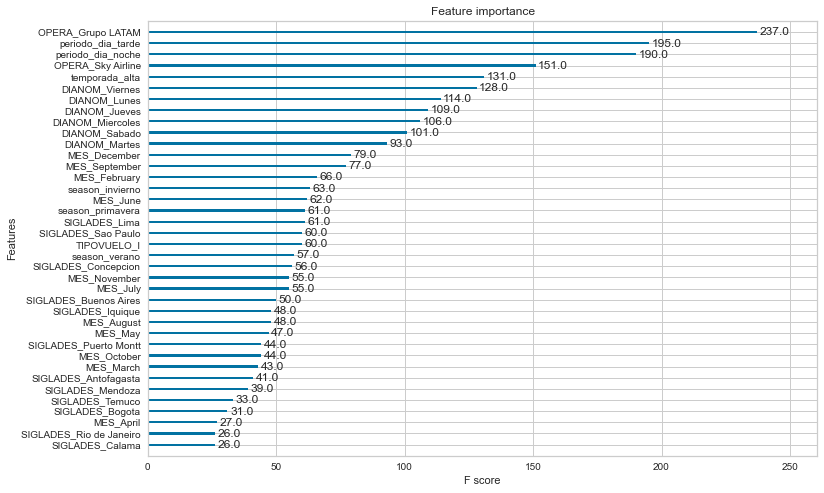

In [83]:
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(xgb_class, ax=ax)

Tambien se pueden plotear los valores estandarizados como lo muestra el siguiente grafico:

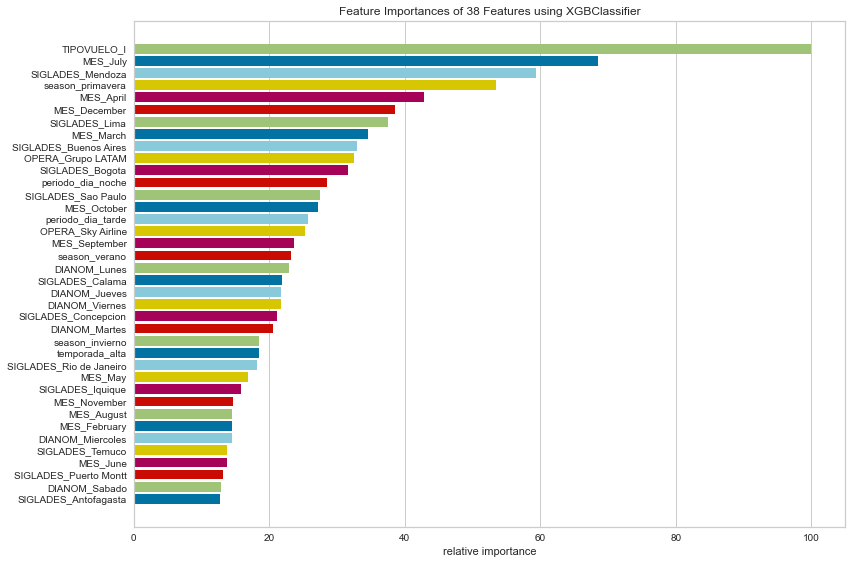

<AxesSubplot:title={'center':'Feature Importances of 38 Features using XGBClassifier'}, xlabel='relative importance'>

In [84]:
from yellowbrick.model_selection import FeatureImportances

fig, ax = plt.subplots(figsize=(12, 8))
fi_viz = FeatureImportances(xgb_class)
fi_viz.fit(X, y)
fi_viz.poof()

El arbol se puede observar en la siguiente figura que la dejare en el repositorio para su mejor visualizacion.

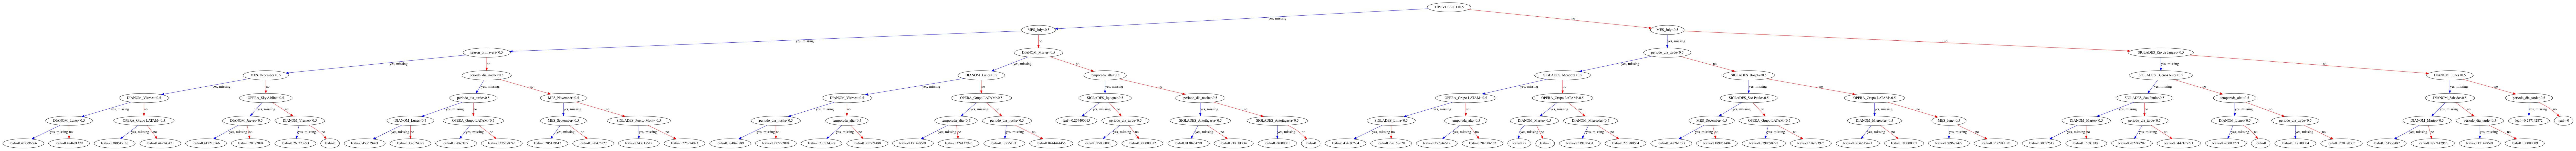

In [85]:
fig, ax = plt.subplots(figsize=(6*30, 4*30))
xgb.plot_tree(xgb_class, ax=ax, num_trees=0)

fig.savefig("XGBoost_Tree.png", dpi=150)

El paquete/libreria `xgbfir`, es una libreria optimizada para XGBoost. Esta libreria permite ver varias medidas de importancia de las `features`. Su unicidad esta en que permite ver columnas, y pares de columnas de tal forma es posible ver interacciones. Incluso llega a soportar triadas de interacciones.

In [86]:
import xgbfir
xgbfir.saveXgbFI(
    xgb_class,
    feature_names=X.columns,
    OutputXlsxFile="fir.xlsx",
)

pd.read_excel("fir.xlsx").head(5).T


,0,1,2,3,4
Interaction,OPERA_Grupo LATAM,TIPOVUELO_I,periodo_dia_noche,periodo_dia_tarde,OPERA_Sky Airline
Gain,1067.767383,831.132258,749.744982,693.715092,529.080403
FScore,237,60,190,195,151
wFScore,20.628103,14.459957,11.098712,16.194429,11.656105
Average wFScore,0.087038,0.240999,0.058414,0.083048,0.077193
Average Gain,4.505348,13.852204,3.946026,3.557513,3.503844
Expected Gain,102.752432,704.947687,73.382826,91.610641,32.561416
Gain Rank,1,2,3,4,5
FScore Rank,1,19,3,2,4
wFScore Rank,1,3,9,2,6


Asi el top 3 de interacciones esta determinada por:
* Mes de Julio / Tipo de vuelo Internacional
* Mes de Julio / primavera
* Grupo LATAM / periodo del dia de tarde

In [87]:
pd.read_excel(
    "fir.xlsx",
    sheet_name="Interaction Depth 1",
).head(5).T

,0,1,2,3,4
Interaction,MES_July|TIPOVUELO_I,MES_July|season_primavera,OPERA_Grupo LATAM|periodo_dia_noche,OPERA_Grupo LATAM|periodo_dia_tarde,OPERA_Grupo LATAM|SIGLADES_Mendoza
Gain,1405.57473,535.549687,517.829047,416.148221,409.492052
FScore,9,6,64,37,19
wFScore,4.943018,2.002583,1.474338,2.423664,3.407776
Average wFScore,0.549224,0.333764,0.023037,0.065504,0.179357
Average Gain,156.17497,89.258281,8.091079,11.247249,21.552213
Expected Gain,736.533102,257.69515,25.042767,56.22713,58.67798
Gain Rank,1,2,3,4,5
FScore Rank,58,74,1,2,11
wFScore Rank,1,16,25,10,3


Al ver las triadas, y al igual que las diadas se da una interpretacion interesante: es que si fueses habilitado a solo usar 3 variables (o 2 variables), sin duda, las variables mas influyentes serian `Mes de Julio`, `Tipo de Vuelo Internacional` y `estacion primavera`.

In [88]:
pd.read_excel(
    "fir.xlsx",
    sheet_name="Interaction Depth 2",
).head(2).T

,0,1
Interaction,MES_July|TIPOVUELO_I|season_primavera,DIANOM_Martes|MES_July|TIPOVUELO_I
Gain,1101.077148,868.046722
FScore,4,4
wFScore,1.941201,0.187218
Average wFScore,0.4853,0.046804
Average Gain,275.269287,217.011681
Expected Gain,538.358407,40.148418
Gain Rank,1,2
FScore Rank,27,28
wFScore Rank,2,49


In [89]:
pd.read_excel(
    "fir.xlsx",
    sheet_name="Interaction Depth 2",
)[["Interaction", "Gain"]].head()

,Interaction,Gain
0,MES_July|TIPOVUELO_I|season_primavera,1101.077148
1,DIANOM_Martes|MES_July|TIPOVUELO_I,868.046722
2,OPERA_Grupo LATAM|SIGLADES_Mendoza|periodo_dia...,492.979194
3,MES_July|periodo_dia_noche|season_primavera,430.965875
4,MES_December|MES_July|season_primavera,411.270020


### 3.5.5 Como podrias mejorar la performance

Uno de los grandes problemas de la muestra es el desbalance de la categoria que intentamos predecir. Donde los atrasos de mas de 15 minutos son 18.5% del total de vuelos del año 2017. Un mecanismo es estimular la categoria minoritaria al punto de equiparla. Existen muchos metodos para hacerlo, sin embargo, solo como una muestra he utilizado el `upsampling` disponible en `sklearn`.

Otra alternativa seria acceder a variables climaticas como por ejemplo, la visibilidad por neblina. Debido a que el aeropuerto esta en una zona con un clima bastante particular dentro de la region. Una hipotesis plausible seria que los dias que hubo retraso fue -en parte- por problemas de visibilidad.

Y finalmente, una ultima opcion es utilizar otro algoritmo de Machine Learning o al menos alguna extension de los ya revisados para poder mejorar significativamente la performance.

In [90]:
df.atraso_15.value_counts()/len(df)

0    0.81506
1    0.18494
Name: atraso_15, dtype: float64

### Upsampling

In [91]:
from sklearn.utils import resample

mask = df.atraso_15 == 1

atraso_df = df[mask]
noatraso_df = df[~mask]

df_upsample = resample(
    atraso_df,
    replace=True,
    n_samples=len(noatraso_df),
    random_state=42,
)

df2 = pd.concat([noatraso_df, df_upsample])

df2.atraso_15.value_counts()

0    55592
1    55592
Name: atraso_15, dtype: int64

In [92]:
df2

,temporada_alta,atraso_15,MES_April,MES_August,MES_December,MES_February,MES_July,MES_June,MES_March,MES_May,...,SIGLADES_Mendoza,SIGLADES_Puerto Montt,SIGLADES_Rio de Janeiro,SIGLADES_Sao Paulo,SIGLADES_Temuco,periodo_dia_noche,periodo_dia_tarde,season_invierno,season_primavera,season_verano
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65712,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1076,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
37273,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14840,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1


In [93]:
y2 = df2.atraso_15
X2 = df2.drop(columns="atraso_15")

In [94]:
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(X2, y2, 
                                                                    test_size=0.3, random_state=42) 

In [95]:
X2 = pd.concat([X_train2, X_test2])
y2 = pd.concat([y_train2, y_test2])

In [96]:
xgb_class = xgb.XGBClassifier(random_state=42)
xgb_class.fit(
    X_train2,
    y_train2,
    early_stopping_rounds=10,
    eval_set=[(X_test2, y_test2)],
)

[0]	validation_0-logloss:0.67543


/Users/jppalmab/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.66602
[2]	validation_0-logloss:0.65719
[3]	validation_0-logloss:0.65250
[4]	validation_0-logloss:0.64901
[5]	validation_0-logloss:0.64727
[6]	validation_0-logloss:0.64460
[7]	validation_0-logloss:0.64170
[8]	validation_0-logloss:0.64059
[9]	validation_0-logloss:0.63873
[10]	validation_0-logloss:0.63792
[11]	validation_0-logloss:0.63676
[12]	validation_0-logloss:0.63529
[13]	validation_0-logloss:0.63394
[14]	validation_0-logloss:0.63324
[15]	validation_0-logloss:0.63243
[16]	validation_0-logloss:0.63094
[17]	validation_0-logloss:0.62994
[18]	validation_0-logloss:0.62909
[19]	validation_0-logloss:0.62811
[20]	validation_0-logloss:0.62716
[21]	validation_0-logloss:0.62669
[22]	validation_0-logloss:0.62595
[23]	validation_0-logloss:0.62487
[24]	validation_0-logloss:0.62397
[25]	validation_0-logloss:0.62350
[26]	validation_0-logloss:0.62307
[27]	validation_0-logloss:0.62206
[28]	validation_0-logloss:0.62079
[29]	validation_0-logloss:0.61970
[30]	validation_0-loglo

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

### Performance

El metodo de `.score` nos da el promedio del accuracy de la prediccion.

In [97]:
xgb_class.score(X_test2, y_test2)

0.6696846144621658

In [98]:
metrics.precision_score(
    y_test2, xgb_class.predict(X_test2))

0.6631628676036376

In [99]:
xgb_class.predict(X2.iloc[[0]])

array([1])

In [100]:
xgb_class.predict_proba(X2.iloc[[0]])

array([[0.43932223, 0.56067777]], dtype=float32)

### 3.5.2 Metricas de evaluacion

/Users/jppalmab/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


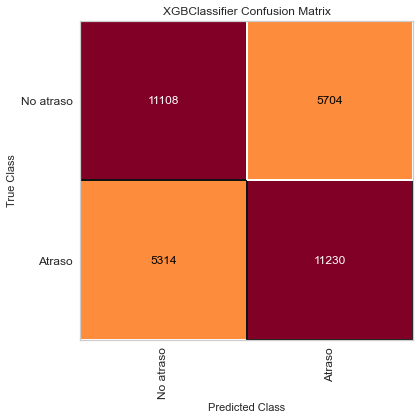

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [101]:
from sklearn.metrics import confusion_matrix
y_pred2 = xgb_class.predict(X_test2)

confusion_matrix(y_test2, y_pred2)

mapping = {0: "No atraso", 1: "Atraso"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    xgb_class,
    classes=["No atraso", "Atraso"],
    label_encoder=mapping,
)
cm_viz.score(X_test2, y_test2)
cm_viz.poof()

In [102]:
confusion_matrix(y_test2, y_pred2)/confusion_matrix(y_test2, y_pred2).sum()*100

array([[33.30135508, 17.10037175],
       [15.93116681, 33.66710637]])

In [103]:
recall = 11230/(11230+5314)
print(recall)

0.6787959381044487


In [104]:
y_pred2 = xgb_class.predict(X_test2)

roc_auc_score(y_test2, y_pred2)

0.6697572362423267